## Observations and Insights 

# Observation Analysis:
Based off the bar graphs it shows that best treatment for reducing tumors are Capomulin and Ramicane.
According to the line plot you will see a drastic decrease in tumor size when using capomulin over the course of 20 days.
The distrubution between male and female is only 2%.

In [30]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combinedData = pd.merge(mouse_metadata, study_results)

# Display the data table for preview
combinedData

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [31]:
# Checking the number of mice.
number_mice = len(combinedData["Mouse ID"].unique())
number_mice

249

In [32]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
 
duplicate_mice = combinedData.loc[combinedData.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [33]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_mice_df = combinedData.loc[combinedData["Mouse ID"] == "g989", :]
duplicated_mice_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [34]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleandata = combinedData[combinedData['Mouse ID'].isin(duplicate_mice)==False]
cleandata 

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [35]:
# Checking the number of mice in the clean DataFrame.
micecleaned= cleandata["Mouse ID"].value_counts()
totalmice=len(micecleaned)
totalmice

248

## Summary Statistics

In [36]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

drugregmean = cleandata.groupby('Drug Regimen').mean()["Tumor Volume (mm3)"]
drugregmean

drugregmedian = cleandata.groupby('Drug Regimen').median()["Tumor Volume (mm3)"]
drugregmedian 

drugregvariance = cleandata.groupby('Drug Regimen').var()["Tumor Volume (mm3)"]
drugregvariance

drugregstd = cleandata.groupby('Drug Regimen').std()["Tumor Volume (mm3)"]
drugregstd 

drugregsem = cleandata.groupby('Drug Regimen').sem()["Tumor Volume (mm3)"]
drugregsem 


Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.544332
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [37]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summarystattable= pd.DataFrame({"Tumor Volume Mean": drugregmean,
                                "Tumor Volume Median":drugregmedian,
                                "Tumor Volume Variance":drugregvariance,
                                "Tumor Volume STD":drugregstd,
                                "Tumor Volume SEM":drugregsem })
summarystattable
# Using the aggregation method, produce the same summary statistics in a single line
summaryaggmethod = cleandata.groupby('Drug Regimen')[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
summaryaggmethod
#summaryaggmethod2= summaryaggmethod.agg(['Mean','Median','Var','STD','SEM'])["Tumor Volume (mm3)"]
#summaryaggmethod2

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<AxesSubplot:title={'center':'Number of Mice per Treatment'}, xlabel='Drug Regimen', ylabel='Number of Mice'>

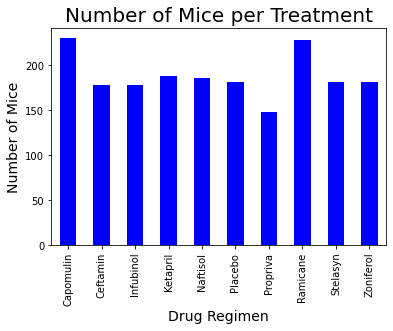

In [38]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
totaltreatedmice= cleandata.groupby(['Drug Regimen']).count()['Mouse ID']

Plotmice= totaltreatedmice.plot.bar(color='b')
plt.xlabel("Drug Regimen",fontsize = 14)
plt.ylabel("Number of Mice",fontsize = 14)
plt.title("Number of Mice per Treatment",fontsize = 20)
Plotmice

Text(0, 0.5, 'Number of Mice')

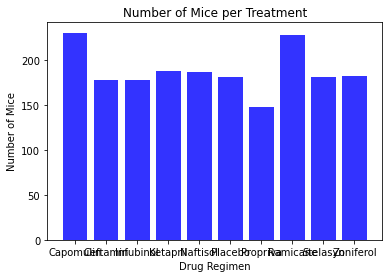

In [39]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = totaltreatedmice.index.values
y_axis = totaltreatedmice.values
plt.bar(x_axis, y_axis, color='b', alpha=0.8, align='center')
plt.title("Number of Mice per Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")


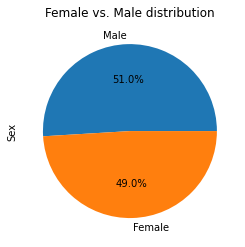

In [40]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_data = cleandata["Sex"].value_counts()
plt.title("Female vs. Male distribution")
gender_data.plot.pie(autopct= "%1.1f%%")
plt.show()

Text(0, 0.5, 'Sex')

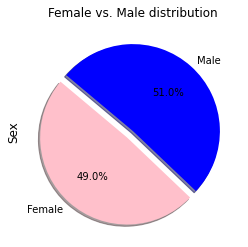

In [41]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
colors= ['pink','blue']
labels= ["Female", "Male"]
sizes = [49.0,51.0]
explode=(0.1,0)
plt.pie(sizes, explode=explode,labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140,)
plt.title("Female vs. Male distribution")
plt.ylabel('Sex',fontsize = 12)


## Quartiles, Outliers and Boxplots

In [42]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
Capomulin = combinedData.loc[combinedData["Drug Regimen"] == "Capomulin",:]
Ramicane = combinedData.loc[combinedData["Drug Regimen"] == "Ramicane", :]
Infubinol = combinedData.loc[combinedData["Drug Regimen"] == "Infubinol", :]
Ceftamin = combinedData.loc[combinedData["Drug Regimen"] == "Ceftamin", :]

# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
Capomulin_last = Capomulin.groupby('Mouse ID').max()['Timepoint']
Capomulin_vol = pd.DataFrame(Capomulin_last)
Capomulin_merge = pd.merge(Capomulin_vol, combinedData, on=("Mouse ID","Timepoint"),how="left")
Capomulin_merge.head()


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


In [43]:
Capomulintumor = Capomulin_merge["Tumor Volume (mm3)"]
Quartiles =Capomulintumor.quantile([.25,.5,.75])
Lowerq = Quartiles[0.25]
Upperq = Quartiles[0.75]
Iqr = Upperq-Lowerq

print(f"The lower quartile of Capomulin tumors: {Lowerq}")
print(f"The upper quartile of Capomulin tumors: {Upperq}")
print(f"The interquartile range of Capomulin tumors: {Iqr}")
print(f"The median of Capomulin tumors: {Quartiles[0.5]} ")

lower_bound = Lowerq - (1.5*Iqr)
upper_bound = Upperq + (1.5*Iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Capomulin tumors: 32.37735684
The upper quartile of Capomulin tumors: 40.1592203
The interquartile range of Capomulin tumors: 7.781863460000004
The median of Capomulin tumors: 38.1251644 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [44]:
Ramicane_last = Ramicane.groupby('Mouse ID').max()['Timepoint']
Ramicane_vol = pd.DataFrame(Ramicane_last)
Ramicane_merge = pd.merge(Ramicane_vol, combinedData, on=("Mouse ID","Timepoint"),how="left")
Ramicane_merge.head()
Ramicane_merge.to_csv("output.csv")

Ramicanetumors = Ramicane_merge["Tumor Volume (mm3)"]

Quartiles= Ramicanetumors.quantile([.25,.5,.75])
Lowerq = Quartiles[0.25]
Upperq = Quartiles[0.75]
Iqr = Upperq-Lowerq


print(f"The lower quartile of Ramicane tumors is: {Lowerq}")
print(f"The upper quartile of Ramicane tumors is: {Upperq}")
print(f"The interquartile range of Ramicane tumors is: {Iqr}")
print(f"The median of Ramicane tumors is: {Quartiles[0.5]} ")

Lower_bound = Lowerq - (1.5*Iqr)
Upper_bound = Upperq + (1.5*Iqr)

print(f"Values below {Lower_bound} could be outliers.")
print(f"Values above {Upper_bound} could be outliers.")

The lower quartile of Ramicane tumors is: 31.56046955
The upper quartile of Ramicane tumors is: 40.65900627
The interquartile range of Ramicane tumors is: 9.098536719999998
The median of Ramicane tumors is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


In [45]:
Infubinol_last = Infubinol.groupby('Mouse ID').max()['Timepoint']
Infubinol_vol = pd.DataFrame(Infubinol_last)
Infubinol_merge = pd.merge(Infubinol_vol, combinedData, on=("Mouse ID","Timepoint"),how="left")
Infubinol_merge.head()
Infubinol_merge.to_csv("output.csv")

Infubinoltumors = Infubinol_merge["Tumor Volume (mm3)"]

Quartiles= Infubinoltumors.quantile([.25,.5,.75])
Lowerq = Quartiles[0.25]
Upperq = Quartiles[0.75]
Iqr = Upperq-Lowerq


print(f"The lower quartile of Infubinol tumors is: {Lowerq}")
print(f"The upper quartile of Infubinol tumors is: {Upperq}")
print(f"The interquartile range of Infubinol tumors is: {Iqr}")
print(f"The median of Infubinol tumors is: {Quartiles[0.5]} ")

Lower_bound = Lowerq - (1.5*Iqr)
Upper_bound = Upperq + (1.5*Iqr)

print(f"Values below {Lower_bound} could be outliers.")
print(f"Values above {Upper_bound} could be outliers.")

The lower quartile of Infubinol tumors is: 54.04860769
The upper quartile of Infubinol tumors is: 65.52574285
The interquartile range of Infubinol tumors is: 11.477135160000003
The median of Infubinol tumors is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


In [46]:
Ceftamin_last = Ceftamin.groupby('Mouse ID').max()['Timepoint']
Ceftamin_vol = pd.DataFrame(Ceftamin_last)
Ceftamin_merge = pd.merge(Ceftamin_vol, combinedData, on=("Mouse ID","Timepoint"),how="left")
Ceftamin_merge.head()
Ceftamin_merge.to_csv("output.csv")

Ceftamintumors = Ceftamin_merge["Tumor Volume (mm3)"]

Quartiles= Ceftamintumors.quantile([.25,.5,.75])
Lowerq = Quartiles[0.25]
Upperq = Quartiles[0.75]
Iqr = Upperq-Lowerq


print(f"The lower quartile of Infubinol tumors is: {Lowerq}")
print(f"The upper quartile of Infubinol tumors is: {Upperq}")
print(f"The interquartile range of Infubinol tumors is: {Iqr}")
print(f"The median of Infubinol tumors is: {Quartiles[0.5]} ")

Lower_bound = Lowerq - (1.5*Iqr)
Upper_bound = Upperq + (1.5*Iqr)

print(f"Values below {Lower_bound} could be outliers.")
print(f"Values above {Upper_bound} could be outliers.")

The lower quartile of Infubinol tumors is: 48.72207785
The upper quartile of Infubinol tumors is: 64.29983003
The interquartile range of Infubinol tumors is: 15.577752179999997
The median of Infubinol tumors is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


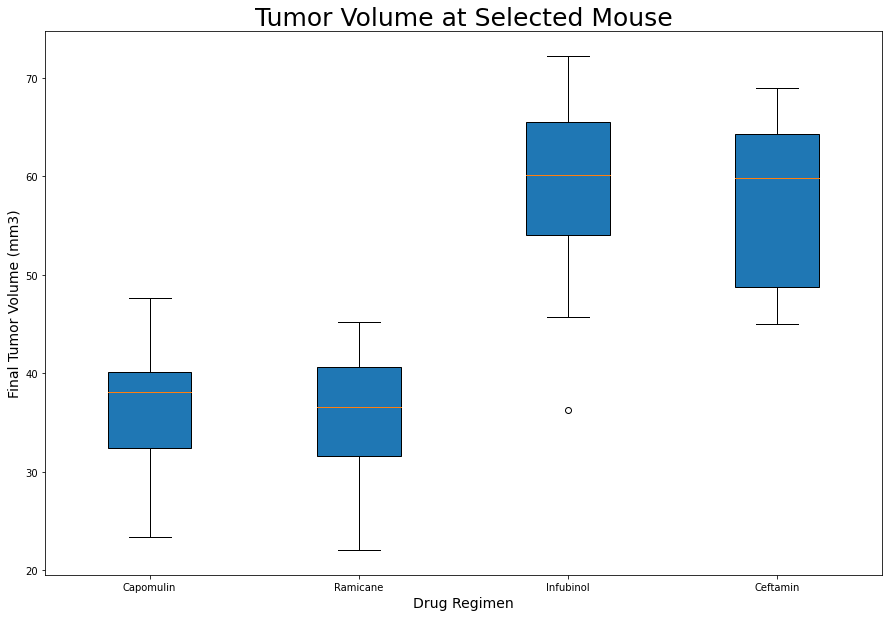

In [47]:
data_to_plot = [Capomulintumor, Ramicanetumors, Infubinoltumors, Ceftamintumors]
Regimen= ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

fig1, ax1 = plt.subplots(figsize=(15, 10))
ax1.set_title('Tumor Volume at Selected Mouse',fontsize =25)
ax1.set_ylabel('Final Tumor Volume (mm3)',fontsize = 14)
ax1.set_xlabel('Drug Regimen',fontsize = 14)
ax1.boxplot(data_to_plot, labels=Regimen, widths = 0.4, patch_artist=True,vert=True)

plt.show()


In [48]:
regimenlist = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
drugregimens = combinedData[combinedData["Drug Regimen"].isin(regimenlist)]
drugregimens.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [49]:
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers.  
 # Locate the rows which contain mice on each drug and get the tumor volumes
 # add subset 
 # Determine outliers using upper and lower bounds
   
timepoint = drugregimens.groupby(["Drug Regimen", "Mouse ID"]).agg(tumor_size=("Tumor Volume (mm3)", lambda x: x.iloc[-1]))
#Reshape dataframe
timepoint = timepoint.stack(level=0).unstack(level=0)
for drugregimens in regimenlist:
    print(drugregimens)

Capomulin
Ramicane
Infubinol
Ceftamin


In [50]:
#for loop
treatment = 0
for drugregimens in regimenlist:
    quartiles = timepoint[drugregimens].quantile([.25,.5,.75]).round(2)
    lowerq = quartiles[0.25].round(2)
    upperq = quartiles[0.75].round(2)
    iqr = round(upperq-lowerq,2)
    lower_bound = round(lowerq - (1.5*iqr),2)
    upper_bound = round(upperq + (1.5*iqr),2)


    if treatment == 0:
        print(f"------------------------------------------------------------")
    print(f"The lower quartile of {drugregimens} treatments is: {lowerq}")
    print(f"The upper quartile of {drugregimens} treatments is: {upperq}")
    print(f"The interquartile range of {drugregimens} treatments is: {iqr}")
    print(f"Values below {lower_bound} could be {drugregimens} outliers.")
    print(f"Values above {upper_bound} could be {drugregimens} outliers.")
    print(f"------------------------------------------------------------")
    treatment+=1


------------------------------------------------------------
The lower quartile of Capomulin treatments is: 32.38
The upper quartile of Capomulin treatments is: 40.16
The interquartile range of Capomulin treatments is: 7.78
Values below 20.71 could be Capomulin outliers.
Values above 51.83 could be Capomulin outliers.
------------------------------------------------------------
The lower quartile of Ramicane treatments is: 31.56
The upper quartile of Ramicane treatments is: 40.66
The interquartile range of Ramicane treatments is: 9.1
Values below 17.91 could be Ramicane outliers.
Values above 54.31 could be Ramicane outliers.
------------------------------------------------------------
The lower quartile of Infubinol treatments is: 54.05
The upper quartile of Infubinol treatments is: 65.53
The interquartile range of Infubinol treatments is: 11.48
Values below 36.83 could be Infubinol outliers.
Values above 82.75 could be Infubinol outliers.
---------------------------------------------

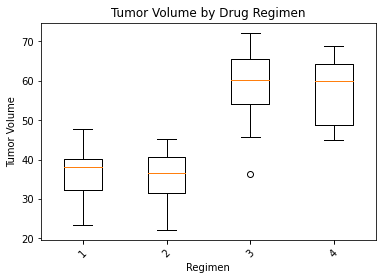

In [51]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
boxplot_list = []
for drugregimens in regimenlist:
    boxplot_list.append(list(timepoint[drugregimens].dropna()))
    
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig = plt.figure()
plt.xlabel("Regimen")
plt.xticks([1,2,3,4], regimenlist, rotation=45)
plt.ylabel("Tumor Volume")
plt.title("Tumor Volume by Drug Regimen")
plt.boxplot(boxplot_list)
plt.show()
    

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

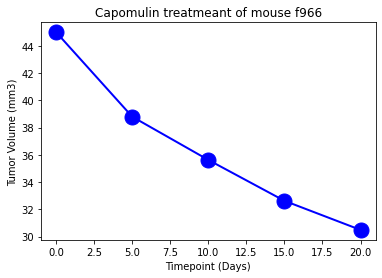

In [52]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
forline_df = Capomulin.loc[Capomulin["Mouse ID"] == "f966",:]
forline_df.head()
x_axis = forline_df["Timepoint"]
tumsiz = forline_df["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
plt.title('Capomulin treatmeant of mouse f966')
plt.plot(x_axis, tumsiz,linewidth=2, markersize=15,marker="o",color="blue", label="Fahreneit")
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

Text(0, 0.5, 'Averag Tumor Volume (mm3)')

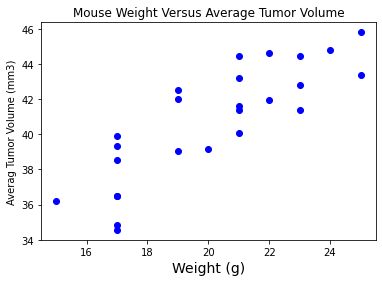

In [53]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
fig1, ax1 = plt.subplots()
averagetumvol =Capomulin.groupby(['Mouse ID']).mean()

marker_size=15
plt.scatter(averagetumvol['Weight (g)'],averagetumvol['Tumor Volume (mm3)'], color="blue")
plt.title('Mouse Weight Versus Average Tumor Volume')
plt.xlabel('Weight (g)',fontsize =14)
plt.ylabel('Averag Tumor Volume (mm3)')

## Correlation and Regression

In [54]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correl=round(st.pearsonr(averagetumvol['Weight (g)'],averagetumvol['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and average tumor volume is {correl}")

The correlation between mouse weight and average tumor volume is 0.84


In [55]:
x_values = averagetumvol['Weight (g)']
y_values = averagetumvol['Tumor Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

print(f"slope:{slope}")
print(f"intercept:{intercept}")
print(f"rvalue (Correlation coefficient):{rvalue}")
print(f"pandas (Correlation coefficient):{correl}")
print(f"stderr:{stderr}")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


slope:0.9544396890241049
intercept:21.552160532685008
rvalue (Correlation coefficient):0.8419363424694721
pandas (Correlation coefficient):0.84
stderr:0.12754359033201323


The r-squared is: 0.7088568047708723


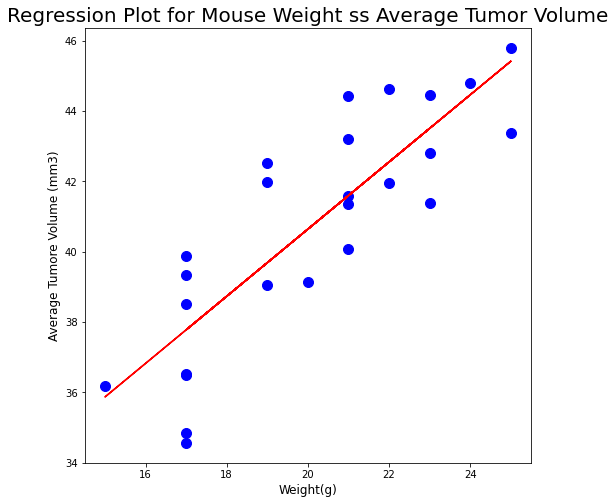

In [56]:
fig1, ax1 = plt.subplots(figsize=(8, 8))
plt.scatter(x_values,y_values,s=100, color="blue")
plt.plot(x_values,regress_values,"r-")
plt.title('Regression Plot for Mouse Weight ss Average Tumor Volume',fontsize =20)
plt.xlabel('Weight(g)',fontsize =12)
plt.ylabel('Average Tumore Volume (mm3)',fontsize =12)
ax1.annotate(line_eq, xy=(20, 369), xycoords='data',xytext=(0.8, 0.95), textcoords='axes fraction',horizontalalignment='right', verticalalignment='top',fontsize=30,color="red")

print(f"The r-squared is: {rvalue**2}")
plt.show()